In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
s_train = pd.read_csv('./data/quickstart/training.csv', index_col="Datetime", parse_dates=True, squeeze=True)
print(s_train)

Datetime
2014-07-01 00:00:00    10844
2014-07-01 00:30:00     8127
2014-07-01 01:00:00     6210
2014-07-01 01:30:00     4656
2014-07-01 02:00:00     3820
                       ...  
2015-01-04 09:30:00     9284
2015-01-04 10:00:00    10955
2015-01-04 10:30:00    13348
2015-01-04 11:00:00    13517
2015-01-04 11:30:00    14443
Name: Traffic, Length: 9000, dtype: int64


In [3]:
from adtk.data import validate_series
s_train = validate_series(s_train)
print(s_train)

Datetime
2014-07-01 00:00:00    10844
2014-07-01 00:30:00     8127
2014-07-01 01:00:00     6210
2014-07-01 01:30:00     4656
2014-07-01 02:00:00     3820
                       ...  
2015-01-04 09:30:00     9284
2015-01-04 10:00:00    10955
2015-01-04 10:30:00    13348
2015-01-04 11:00:00    13517
2015-01-04 11:30:00    14443
Freq: 30T, Name: Traffic, Length: 9000, dtype: int64


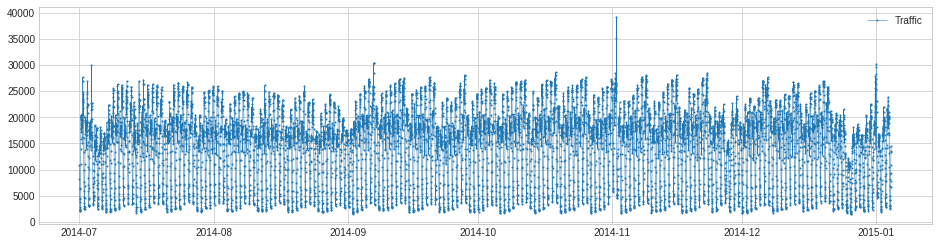

In [4]:
from adtk.visualization import plot
%matplotlib inline
plot(s_train)

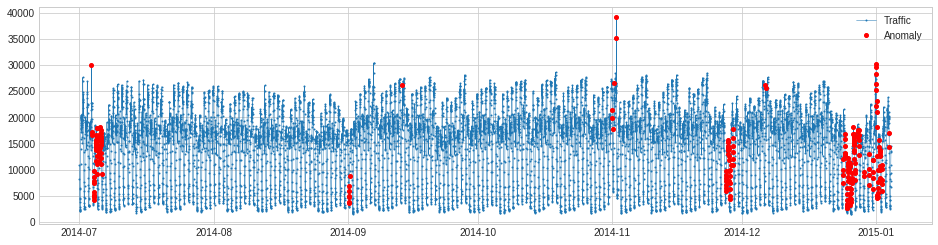

In [5]:
from adtk.detector import SeasonalAD
seasonal_ad = SeasonalAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker");

[(Timestamp('2014-07-03 07:00:00', freq='30T'), Timestamp('2014-07-06 14:59:59.999999999', freq='30T')), (Timestamp('2014-08-31 18:30:00', freq='30T'), Timestamp('2014-09-01 21:59:59.999999999', freq='30T')), (Timestamp('2014-10-31 14:30:00', freq='30T'), Timestamp('2014-11-02 13:59:59.999999999', freq='30T')), (Timestamp('2014-11-26 19:00:00', freq='30T'), Timestamp('2014-11-29 14:29:59.999999999', freq='30T')), (Timestamp('2014-12-23 19:00:00', freq='30T'), Timestamp('2014-12-28 13:59:59.999999999', freq='30T')), (Timestamp('2014-12-28 19:30:00', freq='30T'), Timestamp('2015-01-02 21:29:59.999999999', freq='30T'))]


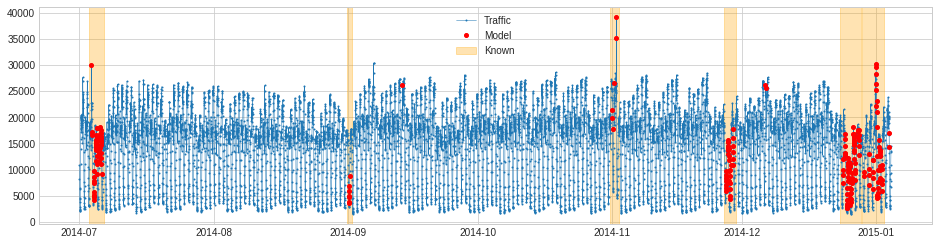

In [6]:
known_anomalies = pd.read_csv("./data/quickstart/known_anomalies.csv", index_col="Datetime", parse_dates=True, squeeze=True)
known_anomalies = validate_series(known_anomalies)
from adtk.data import to_events
known_anomalies = to_events(known_anomalies)
print(known_anomalies)
plot(s_train, 
     anomaly={"Known": known_anomalies, "Model": anomalies}, 
     anomaly_tag={"Known": "span", "Model": "marker"},
     anomaly_color={"Known": "orange", "Model": "red"});

Datetime
2015-01-04 12:00:00    15285
2015-01-04 12:30:00    16028
2015-01-04 13:00:00    16329
2015-01-04 13:30:00    15891
2015-01-04 14:00:00    15960
                       ...  
2015-01-31 21:30:00    24670
2015-01-31 22:00:00    25721
2015-01-31 22:30:00    27309
2015-01-31 23:00:00    26591
2015-01-31 23:30:00    26288
Freq: 30T, Name: Traffic, Length: 1320, dtype: int64


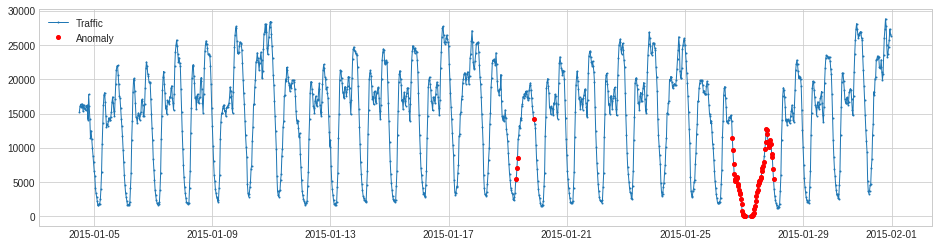

In [7]:
s_test = pd.read_csv("./data/quickstart/testing.csv", index_col="Datetime", parse_dates=True, squeeze=True)
s_test = validate_series(s_test)
print(s_test)
anomalies_pred = seasonal_ad.detect(s_test)
plot(s_test, anomaly=anomalies_pred, ts_linewidth=1, anomaly_color='red', anomaly_tag="marker");